# **Replication Analysis**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
from scipy.stats import pearsonr

## Differential Model

In [4]:
# parameter statistics

RAll = pd.read_csv('../Outputs/Lmfit_replication_RHM_Dif.csv')

params = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'BIC', 'R^2']

print('Average Rutledge Change Weights')
for i in params:
    print( i + ' Mean: ' + str(np.mean(RAll[i])))
    print( i + ' Median: ' + str(np.median(RAll[i])))
    print( i + ' SD: ' + str(np.std(RAll[i])))

print('\n')

DCAll = pd.read_csv('../Outputs/Lmfit_replication_DC_Dif.csv')

params = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline','Linear Attraction', 'Cubic Attraction', 'BIC', 'R^2']

print('Average DynAffect-C Change Weights')
for i in params:
    print( i + ' Mean: ' + str(np.mean(DCAll[i])))
    print( i + ' Median: ' + str(np.median(DCAll[i])))
    print( i + ' SD: ' + str(np.std(DCAll[i])))

print('BIC Difference: ', stat.ttest_rel(DCAll['BIC'], RAll['BIC']))

# determine types of attraction dynamics
positive = 0
negative = 0
pos_neg = 0
neg_pos = 0
for i in range(0, len(DCAll)):
    if (DCAll['Cubic Attraction'][i]>=0):
        if (DCAll['Linear Attraction'][i]>0):
            positive += 1
        else:
            pos_neg += 1
    else:
        if (DCAll['Linear Attraction'][i]>0):
            neg_pos += 1
        else:
            negative += 1
print('Alpha positive, Beta positive: ', positive)
print('Alpha positive, Beta negative: ', pos_neg)
print('Alpha negative, Beta positive: ', neg_pos)
print('Alpha negative, Beta negative: ', negative)

Average Rutledge Change Weights
Certain Reward Mean: 0.12324506290618097
Certain Reward Median: 0.0860762869814424
Certain Reward SD: 0.1739936350884043
Expected Value Mean: 0.08224832665928473
Expected Value Median: 0.0612665178112208
Expected Value SD: 0.09846369727042008
Prediction Error Mean: 0.1583408755211484
Prediction Error Median: 0.1142492671151753
Prediction Error SD: 0.15993329685949978
Forgetting Factor Mean: 0.6278629737314282
Forgetting Factor Median: 0.6531495382076115
Forgetting Factor SD: 0.26112695613934306
BIC Mean: 239.83135257295567
BIC Median: 237.70505828205185
BIC SD: 76.31295016307139
R^2 Mean: 0.4195902382061856
R^2 Median: 0.4461044735205516
R^2 SD: 0.21520250473383282


Average DynAffect-C Change Weights
Certain Reward Mean: 0.09775992464622602
Certain Reward Median: 0.0530862148067403
Certain Reward SD: 0.11729870178474608
Expected Value Mean: 0.07093267586764233
Expected Value Median: 0.0512140444348534
Expected Value SD: 0.08676160384456613
Prediction Er

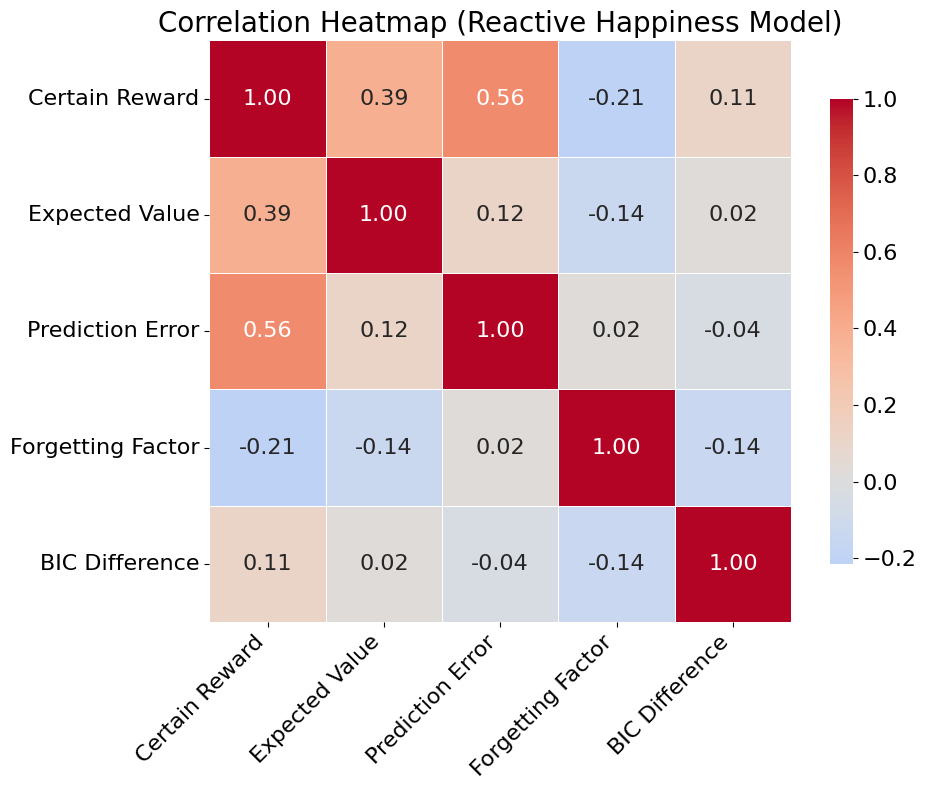

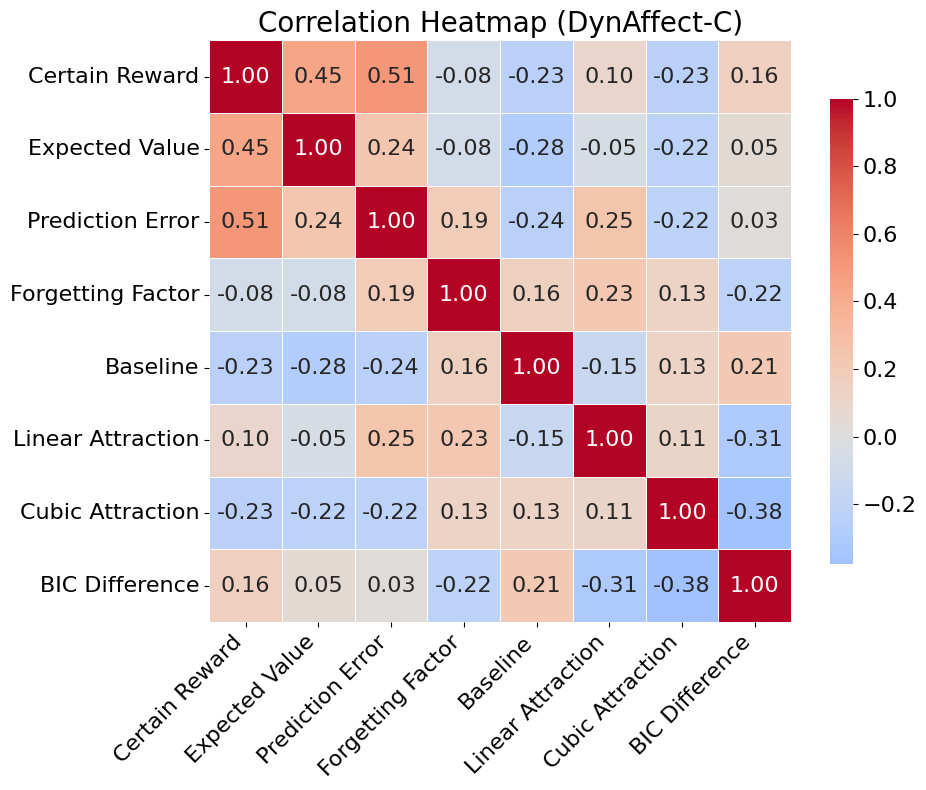

|Beta| and BIC Difference Correlation:  PearsonRResult(statistic=-0.5204537194319818, pvalue=0.00012640575125531613)


In [5]:
diff = DCAll['BIC'] - RAll['BIC']
RAll['BIC Difference'] = diff
DCAll['BIC Difference'] = diff

# correlation + p-value function
def correlation_with_pvalues(df, params):
    cols = params
    corr_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)
    pval_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)
    formatted_matrix = pd.DataFrame(index=cols, columns=cols, dtype=object)

    for param1 in cols:
        for param2 in cols:
            corr, pval = pearsonr(df[param1], df[param2])
            corr_matrix.loc[param1, param2] = corr
            pval_matrix.loc[param1, param2] = pval
            formatted_matrix.loc[param1, param2] = f"{corr:.3f} (p={pval:.5f})"

    return corr_matrix, formatted_matrix

# heatmap plotting function
def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True,
                linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 16})
    plt.title(title, fontsize=20)
    plt.xticks(rotation=45, ha='right', fontsize = 16)
    plt.yticks(rotation=0, fontsize=16)
    colorbar = ax.collections[0].colorbar
    colorbar.ax.tick_params(labelsize=16)
    plt.tight_layout()
    plt.savefig('../Figures/' + title + '_Dif_replication.png', dpi=1200)
    plt.show()
    

# generate RHM heatmap
params1 = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'BIC Difference']
corr_matrix_rall, formatted, = correlation_with_pvalues(RAll, params1)
plot_heatmap(corr_matrix_rall, "Correlation Heatmap (Reactive Happiness Model)")

# generate DC heatmap
params2 = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline', 'Linear Attraction', 'Cubic Attraction', 'BIC Difference']
corr_matrix_dcall, formatted, = correlation_with_pvalues(DCAll, params2)
plot_heatmap(corr_matrix_dcall, "Correlation Heatmap (DynAffect-C)")

DCAll['absBeta'] = np.abs(DCAll['Linear Attraction'])
print('|Beta| and BIC Difference Correlation: ', pearsonr(DCAll['absBeta'], DCAll['BIC Difference']))

In [6]:
# calculate effect sizes

def cohen_d(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1, ddof=1)  # sample std
    std2 = np.std(group2, ddof=1)

    # pooled standard deviation
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2) / (n1 + n2 - 2))

    # cohen's d
    cohens_d = (mean1 - mean2) / pooled_std
    return cohens_d

print('BIC Difference: ', stat.ttest_rel(DCAll['BIC'], RAll['BIC']))
print('Forgetting Factor: ', stat.ttest_rel(DCAll['Forgetting Factor'], RAll['Forgetting Factor']))
print(f"Cohen's d (change in forgetting factor): {cohen_d(DCAll['Forgetting Factor'], RAll['Forgetting Factor']):.3f}")
print(f"Cohen's d (change in variance explained): {cohen_d(DCAll['R^2'], RAll['R^2']):.3f}")
print(f"Cohen's d (DynAffect-C and original happiness model BIC): {cohen_d(DCAll['BIC'], RAll['BIC']):.3f}")

BIC Difference:  TtestResult(statistic=-3.209820909820746, pvalue=0.0023697369603248915, df=48)
Forgetting Factor:  TtestResult(statistic=5.897115235976994, pvalue=3.598929777862275e-07, df=48)
Cohen's d (change in forgetting factor): 0.426
Cohen's d (change in variance explained): 0.816
Cohen's d (DynAffect-C and original happiness model BIC): -0.084


/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_64738/849915220.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_data, x='Model', y=param, palette=palette, ax=axes[i])
/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_64738/849915220.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_data, x='Model', y=param, palette=palette, ax=axes[i])
/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_64738/849915220.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_da

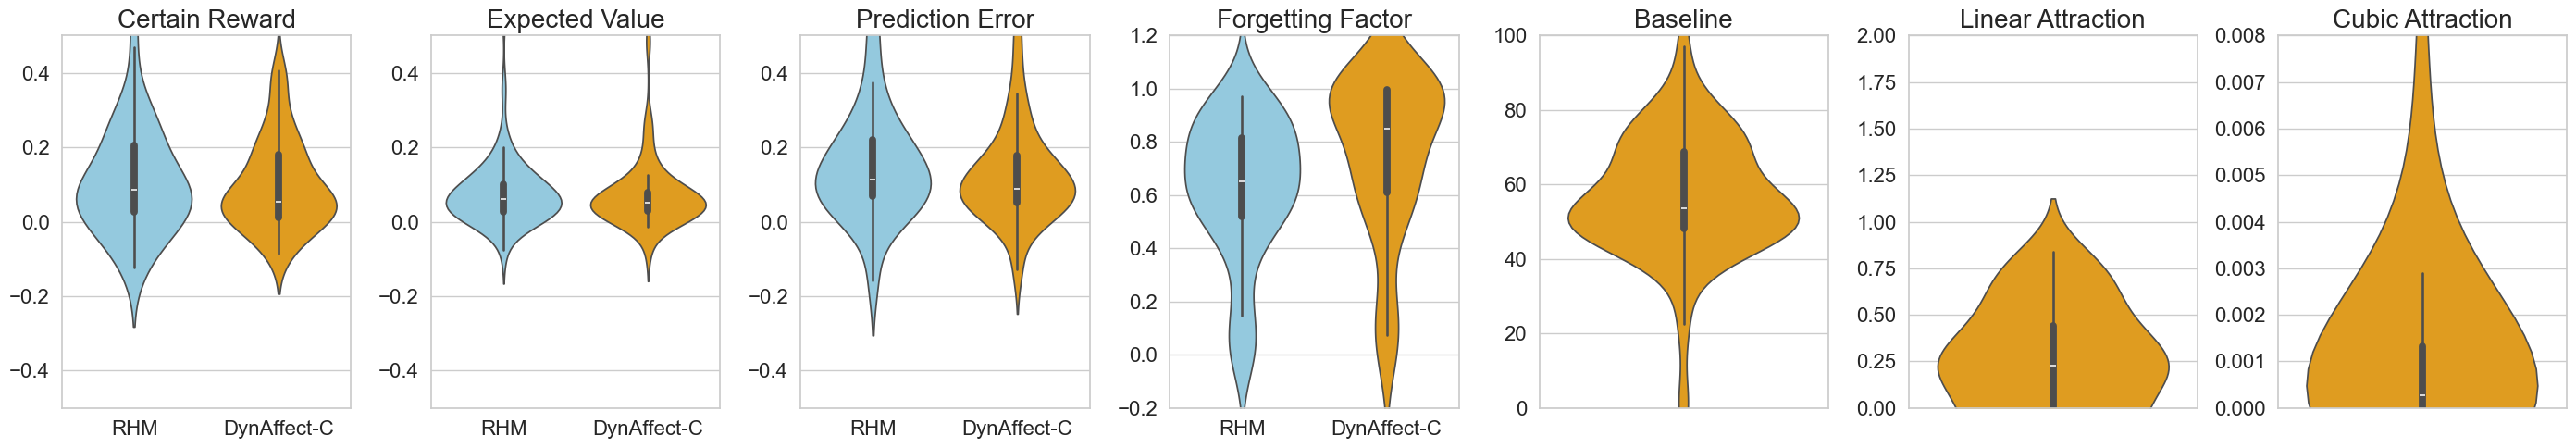

In [7]:
# generate violin plots

# parameters to compare
common_params = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor']
dynonly_params = ['Baseline', 'Linear Attraction', 'Cubic Attraction']

# prepare combined dataframe for common parameters
combined_data = pd.concat([
    RAll[common_params].assign(Model='RHM'),
    DCAll[common_params].assign(Model='DynAffect-C')
])


palette = {'RHM': 'skyblue', 'DynAffect-C': 'orange'}
sns.set(style='whitegrid')
n_plots = len(common_params) + len(dynonly_params)
fig, axes = plt.subplots(1, n_plots, figsize=(4 * n_plots, 5), sharey=False)

# plot shared parameters with both models
for i, param in enumerate(common_params):
    sns.violinplot(data=combined_data, x='Model', y=param, palette=palette, ax=axes[i])
    axes[i].set_title(param, fontsize=20)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='y', labelsize=16)
    axes[i].tick_params(axis='x', labelsize=16)

# plot DynAffect-only parameters (Baseline, Beta, Alpha)
for j, param in enumerate(dynonly_params):
    sns.violinplot(data=DCAll, y=param, color='orange', ax=axes[len(common_params) + j])
    axes[len(common_params) + j].set_title(param, fontsize=20)
    axes[len(common_params) + j].set_xlabel('')
    axes[len(common_params) + j].set_ylabel('')
    axes[len(common_params) + j].set_xticks([])
    axes[len(common_params) + j].tick_params(axis='y', labelsize=16)

axes[0].set_ylim([-0.5, 0.5])
axes[1].set_ylim([-0.5, 0.5])
axes[2].set_ylim([-0.5, 0.5])
axes[3].set_ylim([-0.2, 1.2])
axes[4].set_ylim([0, 100])
axes[5].set_ylim([0, 2])
axes[6].set_ylim([0, 0.008])



plt.tight_layout()
plt.savefig('../Figures/violin_replication.png', dpi=1200)
plt.show()

## Non-Differential

In [8]:
# parameter statistics

RAll = pd.read_csv('../Outputs/Lmfit_replication_RHM_NonDif.csv')

params = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline', 'BIC', 'R^2']

print('Average Rutledge Change Weights')
for i in params:
    print( i + ' Mean: ' + str(np.mean(RAll[i])))
    print( i + ' Median: ' + str(np.median(RAll[i])))
    print( i + ' SD: ' + str(np.std(RAll[i])))

print('\n')

DCAll = pd.read_csv('../Outputs/Lmfit_replication_DC_NonDif.csv')

params = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline','Linear Attraction', 'Cubic Attraction', 'BIC', 'R^2']

print('Average DynAffect-C Change Weights')
for i in params:
    print( i + ' Mean: ' + str(np.mean(DCAll[i])))
    print( i + ' Median: ' + str(np.median(DCAll[i])))
    print( i + ' SD: ' + str(np.std(DCAll[i])))

print('BIC Difference: ', stat.ttest_rel(DCAll['BIC'], RAll['BIC']))

# determine types of attraction dynamics
positive = 0
negative = 0
pos_neg = 0
neg_pos = 0
for i in range(0, len(DCAll)):
    if (DCAll['Cubic Attraction'][i]>=0):
        if (DCAll['Linear Attraction'][i]>0):
            positive += 1
        else:
            pos_neg += 1
    else:
        if (DCAll['Linear Attraction'][i]>0):
            neg_pos += 1
        else:
            negative += 1
print('Alpha positive, Beta positive: ', positive)
print('Alpha positive, Beta negative: ', pos_neg)
print('Alpha negative, Beta positive: ', neg_pos)
print('Alpha negative, Beta negative: ', negative)

Average Rutledge Change Weights
Certain Reward Mean: 0.13592952208131973
Certain Reward Median: 0.0818454052583508
Certain Reward SD: 0.14167613912697635
Expected Value Mean: 0.05719572530318029
Expected Value Median: 0.0304485778280882
Expected Value SD: 0.07959593870827648
Prediction Error Mean: 0.15795022420315746
Prediction Error Median: 0.1252303132987646
Prediction Error SD: 0.1440015294254794
Forgetting Factor Mean: 0.7977855924344842
Forgetting Factor Median: 0.8753017257150639
Forgetting Factor SD: 0.20453604204131356
Baseline Mean: 59.37125698417906
Baseline Median: 55.60544335865659
Baseline SD: 16.806813363609773
BIC Mean: 234.29731913102043
BIC Median: 235.2202106067431
BIC SD: 79.54193218205025
R^2 Mean: 0.45063118294499316
R^2 Median: 0.5465079193878792
R^2 SD: 0.5370265038270416


Average DynAffect-C Change Weights
Certain Reward Mean: 0.14935954771107826
Certain Reward Median: 0.1155743549215873
Certain Reward SD: 0.14822892129286688
Expected Value Mean: 0.061133346997

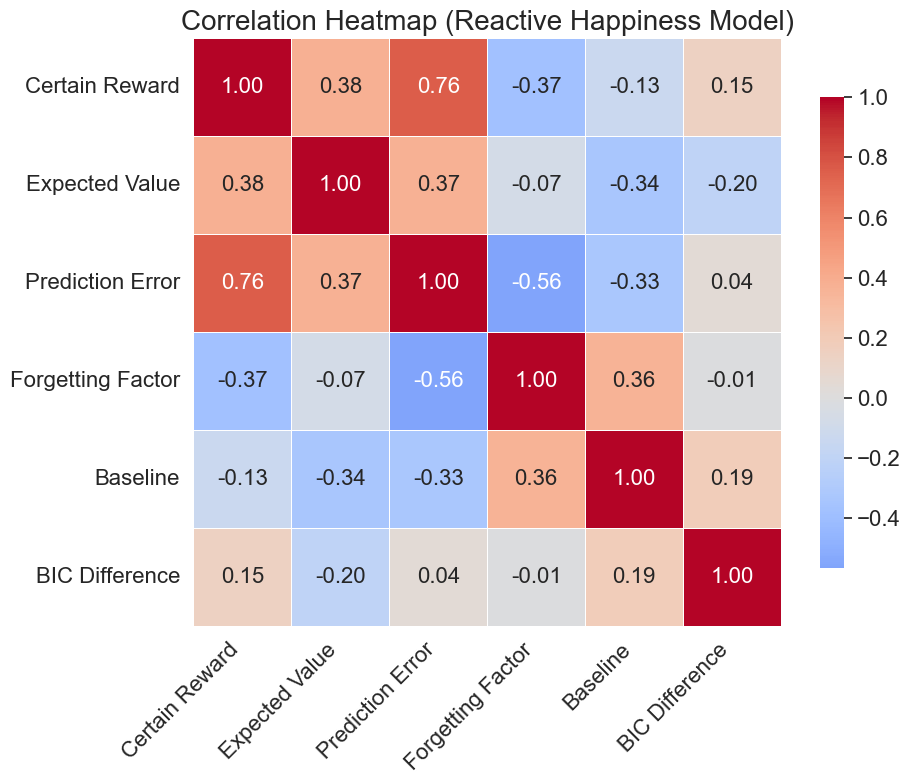

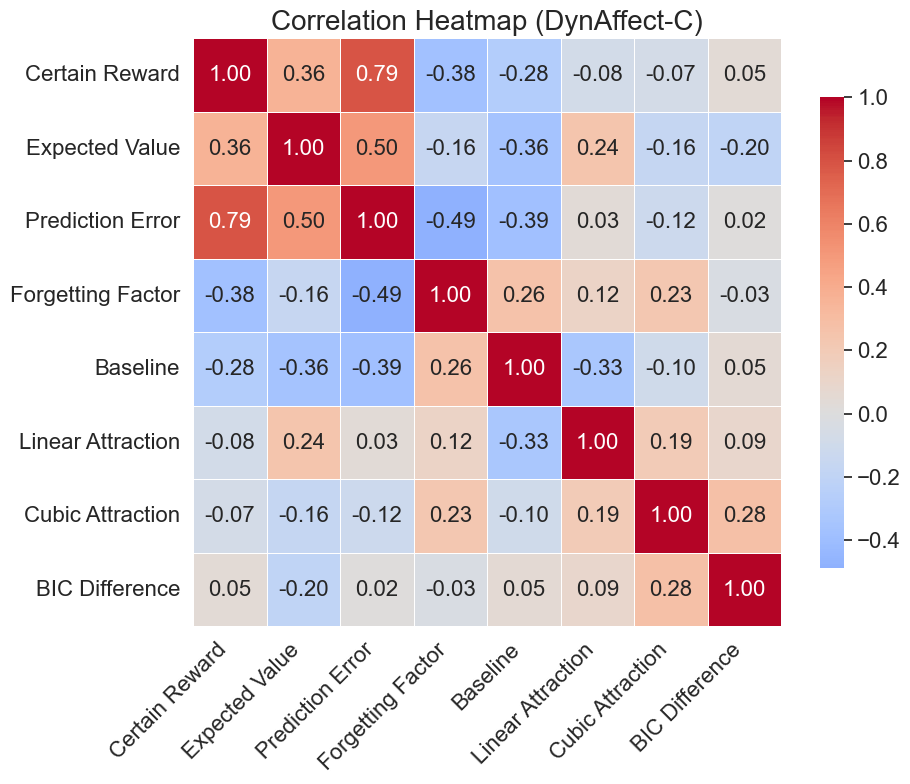

|Beta| and BIC Difference Correlation:  PearsonRResult(statistic=0.28207804762533767, pvalue=0.0495705691219164)


In [13]:
diff = DCAll['BIC'] - RAll['BIC']
RAll['BIC Difference'] = diff
DCAll['BIC Difference'] = diff

# correlation/p-value function
def correlation_with_pvalues(df, params):
    cols = params
    corr_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)
    pval_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)
    formatted_matrix = pd.DataFrame(index=cols, columns=cols, dtype=object)

    for param1 in cols:
        for param2 in cols:
            corr, pval = pearsonr(df[param1], df[param2])
            corr_matrix.loc[param1, param2] = corr
            pval_matrix.loc[param1, param2] = pval
            formatted_matrix.loc[param1, param2] = f"{corr:.3f} (p={pval:.5f})"

    return corr_matrix, formatted_matrix

# heatmap plotting function
def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True,
                linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 16})
    plt.title(title, fontsize=20)
    plt.xticks(rotation=45, ha='right', fontsize = 16)
    plt.yticks(rotation=0, fontsize=16)
    colorbar = ax.collections[0].colorbar
    colorbar.ax.tick_params(labelsize=16)
    plt.tight_layout()
    plt.savefig('../Figures/' + title + '_NonDif_replication.png', dpi=1200)
    plt.show()
    

# generate RHM heatmap
params1 = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline', 'BIC Difference']
corr_matrix_rall, formatted, = correlation_with_pvalues(RAll, params1)
plot_heatmap(corr_matrix_rall, "Correlation Heatmap (Reactive Happiness Model)")

# generate DC heatmap
params2 = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline', 'Linear Attraction', 'Cubic Attraction', 'BIC Difference']
corr_matrix_dcall, formatted, = correlation_with_pvalues(DCAll, params2)
plot_heatmap(corr_matrix_dcall, "Correlation Heatmap (DynAffect-C)")

DCAll['absBeta'] = np.abs(DCAll['Linear Attraction'])
print('|Beta| and BIC Difference Correlation: ', pearsonr(DCAll['absBeta'], DCAll['BIC Difference']))

In [14]:
# calculate effect sizes

def cohen_d(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1, ddof=1)  # sample std
    std2 = np.std(group2, ddof=1)

    # pooled standard deviation
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2) / (n1 + n2 - 2))

    # cohen's d
    cohens_d = (mean1 - mean2) / pooled_std
    return cohens_d

print('BIC Difference: ', stat.ttest_rel(DCAll['BIC'], RAll['BIC']))
print('Forgetting Factor: ', stat.ttest_rel(DCAll['Forgetting Factor'], RAll['Forgetting Factor']))
print(f"Cohen's d (change in forgetting factor): {cohen_d(DCAll['Forgetting Factor'], RAll['Forgetting Factor']):.3f}")
print(f"Cohen's d (change in variance explained): {cohen_d(DCAll['R^2'], RAll['R^2']):.3f}")
print(f"Cohen's d (DynAffect-C and original happiness model BIC): {cohen_d(DCAll['BIC'], RAll['BIC']):.3f}")

BIC Difference:  TtestResult(statistic=-0.8846704492463041, pvalue=0.38074456008030755, df=48)
Forgetting Factor:  TtestResult(statistic=-4.709605949131932, pvalue=2.1509665829050468e-05, df=48)
Cohen's d (change in forgetting factor): -0.680
Cohen's d (change in variance explained): 0.321
Cohen's d (DynAffect-C and original happiness model BIC): -0.045


/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_64738/3478543319.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_data, x='Model', y=param, palette=palette, ax=axes[i])
/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_64738/3478543319.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_data, x='Model', y=param, palette=palette, ax=axes[i])
/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_64738/3478543319.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined

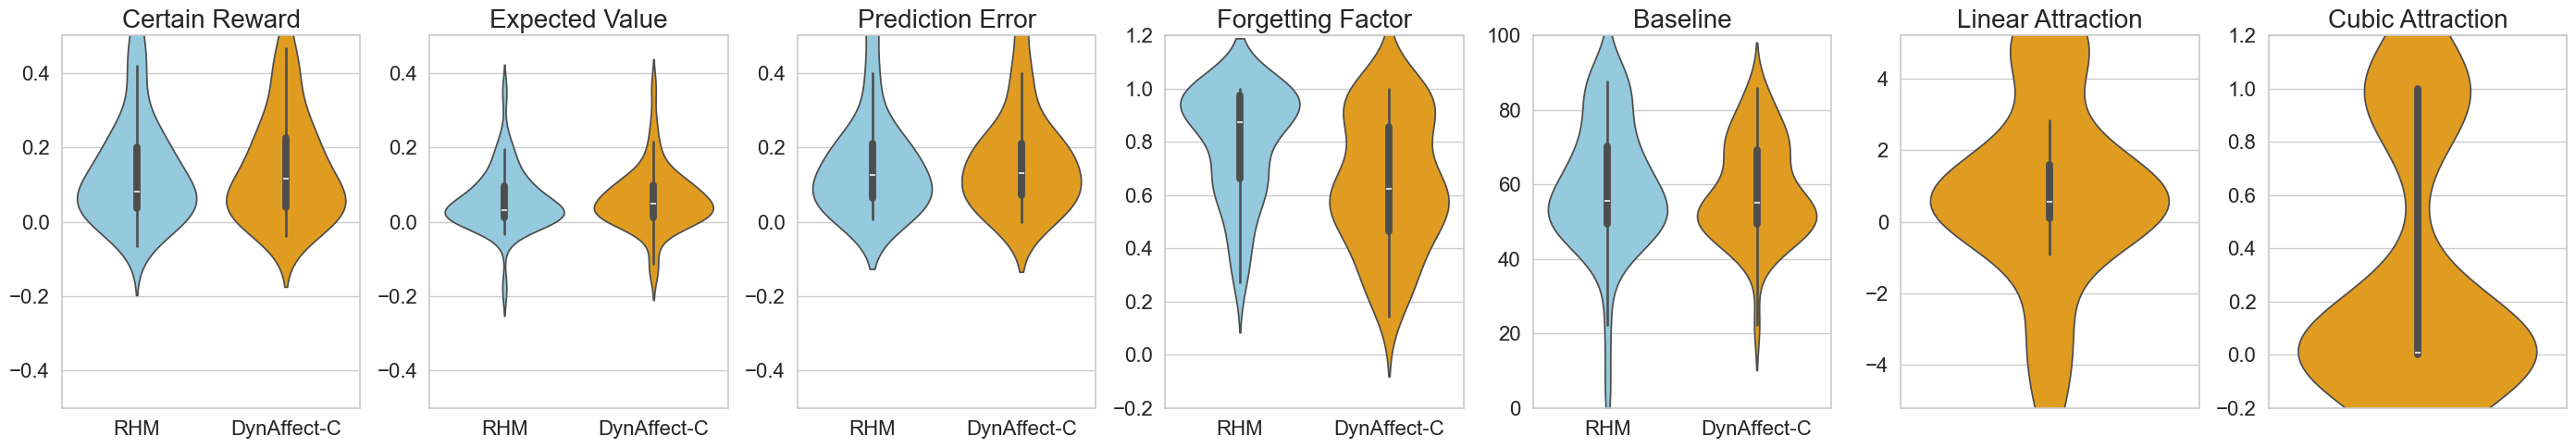

In [15]:
# generate violin plots

# parameters to compare
common_params = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline']
dynonly_params = ['Linear Attraction', 'Cubic Attraction']

# prepare combined dataframe for common parameters
combined_data = pd.concat([
    RAll[common_params].assign(Model='RHM'),
    DCAll[common_params].assign(Model='DynAffect-C')
])


palette = {'RHM': 'skyblue', 'DynAffect-C': 'orange'}
sns.set(style='whitegrid')
n_plots = len(common_params) + len(dynonly_params)
fig, axes = plt.subplots(1, n_plots, figsize=(4 * n_plots, 5), sharey=False)

# plot shared parameters with both models
for i, param in enumerate(common_params):
    sns.violinplot(data=combined_data, x='Model', y=param, palette=palette, ax=axes[i])
    axes[i].set_title(param, fontsize=20)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='y', labelsize=16)
    axes[i].tick_params(axis='x', labelsize=16)

# plot DynAffect-only parameters (Beta, Alpha)
for j, param in enumerate(dynonly_params):
    sns.violinplot(data=DCAll, y=param, color='orange', ax=axes[len(common_params) + j])
    axes[len(common_params) + j].set_title(param, fontsize=20)
    axes[len(common_params) + j].set_xlabel('')
    axes[len(common_params) + j].set_ylabel('')
    axes[len(common_params) + j].set_xticks([])
    axes[len(common_params) + j].tick_params(axis='y', labelsize=16)

axes[0].set_ylim([-0.5, 0.5])
axes[1].set_ylim([-0.5, 0.5])
axes[2].set_ylim([-0.5, 0.5])
axes[3].set_ylim([-0.2, 1.2])
axes[4].set_ylim([0, 100])
axes[5].set_ylim([-5.2, 5.2])
axes[6].set_ylim([-0.2, 1.2])

plt.tight_layout()
plt.savefig('../Figures/violin_NonDif_replication.png', dpi=1200)
plt.show()